### Bank Marketing Data Set

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing   

The data is related with direct marketing campaigns of a Portuguese banking institution.   
The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required,   
in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

### __1__. Imports

In [1]:
import pandas as pd
import numpy as np
import itertools
import datetime
import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
matplotlib.rcParams.update({'font.size': 12})
matplotlib.rcParams.update({'figure.figsize': (12,6)})
matplotlib.rcParams["axes.grid"] = True

In [2]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import warnings
warnings.filterwarnings('ignore')

In [3]:
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('notebook')
sns.set_palette('muted')

In [4]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, auc, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

### __2__. Data Loading and Analysis

In [5]:
df = pd.read_csv(r"./data/bank-full.csv", sep=';')
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
# Целевая переменная
df.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
# Есть ли пропущенные значения
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [11]:
# Обзор объектных признаков
for cat_colname in df.select_dtypes(include='object').columns:
    print(str(cat_colname) + '\n' + '=' * 20 + '\n' + str(df[cat_colname].value_counts()) + '\n' + '*' * 30 + '\n')

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
******************************

marital
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
******************************

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
******************************

default
no     44396
yes      815
Name: default, dtype: int64
******************************

housing
yes    25130
no     20081
Name: housing, dtype: int64
******************************

loan
no     37967
yes     7244
Name: loan, dtype: int64
******************************

contact
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
******************************

month

__Duration__: last contact duration, in seconds (numeric).   
Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no').   
Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known.   
Thus, this input should only be included for benchmark purposes and should be discarded if the intention    
is to have a realistic predictive model.

In [12]:
df = df.drop('duration', axis=1)

In [13]:
# Числовые признаки
num_col = df.select_dtypes(include='number').columns.to_list()
num_col

['age', 'balance', 'day', 'campaign', 'pdays', 'previous']

In [14]:
# Преобразуем целевой столбец
df.loc[:,'y'] = df['y'].map({'yes': 1, 'no': 0})

In [15]:
# Объектные признаки
obj_col = df.select_dtypes(include='object').columns.to_list()
obj_col

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [16]:
# Признаки с двумя значениями yes/no
yesno_col = [x for x in obj_col if len(df[x].unique()) < 3]
yesno_col

['default', 'housing', 'loan']

In [17]:
# Признаки с более, чем двумя значениями
cat_col = [x for x in obj_col if len(df[x].unique()) >= 3]
cat_col

['job', 'marital', 'education', 'contact', 'month', 'poutcome']

### EDA

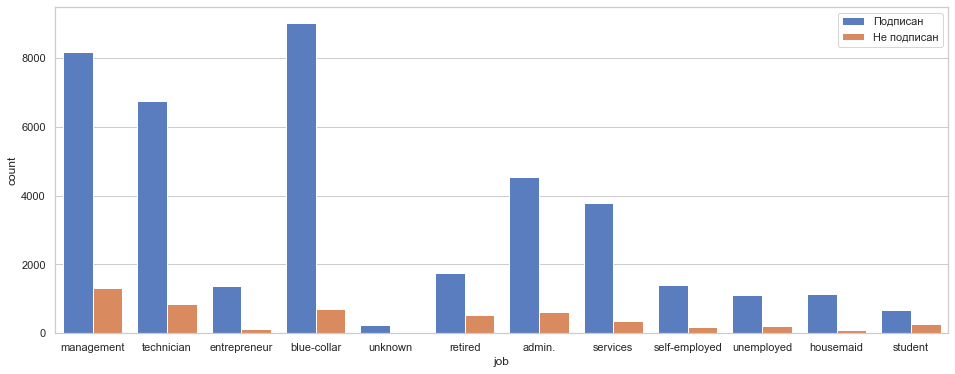

In [18]:
# Соотношение Подписан/Не подписан по Виду Работы
matplotlib.rcParams.update({'figure.figsize': (16,6)})
labels = ["Подписан", "Не подписан"]
ax = sns.countplot(x="job", hue="y", data=df)
ax.legend(labels)

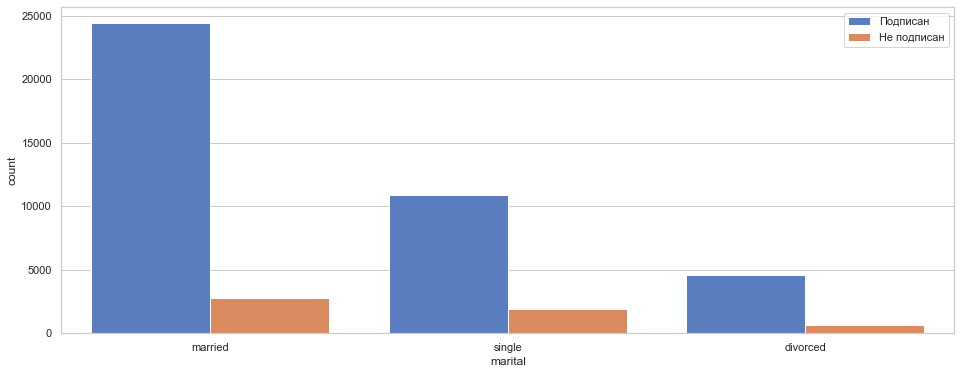

In [19]:
# Соотношение Подписан/Не подписан по Семейному положению
labels = ["Подписан", "Не подписан"]
ax = sns.countplot(x="marital", hue="y", data=df)
ax.legend(labels)

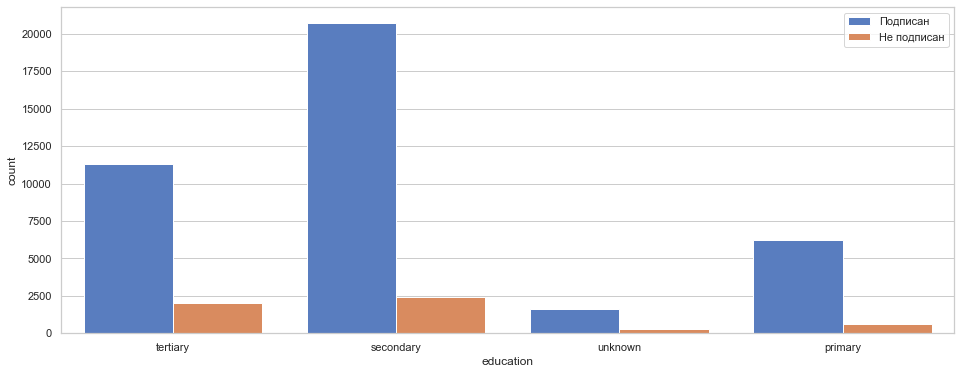

In [20]:
# Соотношение Подписан/Не подписан по Уровню образования
labels = ["Подписан", "Не подписан"]
ax = sns.countplot(x="education", hue="y", data=df)
ax.legend(labels)

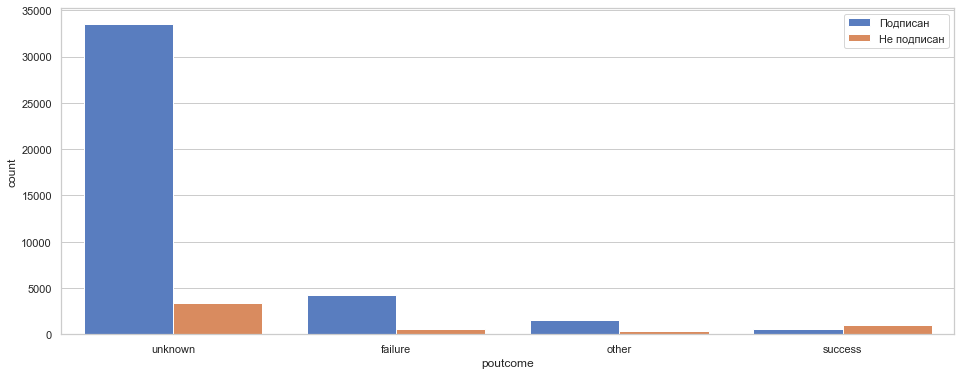

In [21]:
# Соотношение Подписан/Не подписан по Результам предыдущей маркетинговой кампании
labels = ["Подписан", "Не подписан"]
ax = sns.countplot(x="poutcome", hue="y", data=df)
ax.legend(labels)

### Feature Engineering

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

In [23]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null int64
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


In [25]:
# Сохраним отложенную выборку
X_train, X_test, y_train, y_test = train_test_split(df.loc[:,df.columns != 'y'], 
                                                    df.loc[:,df.columns == 'y'], random_state=42)
# Save test
X_test.to_csv("X_test.csv", index=None)
y_test.to_csv("y_test.csv", index=None)
# Save train
X_train.to_csv("X_train.csv", index=None)
y_train.to_csv("y_train.csv", index=None)
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
41626,52,admin.,married,secondary,no,118,no,no,cellular,25,sep,1,-1,0,unknown
31347,28,student,single,secondary,no,459,no,no,cellular,16,mar,13,-1,0,unknown
22563,36,management,single,tertiary,no,156,no,no,cellular,22,aug,1,-1,0,unknown
37243,55,entrepreneur,married,tertiary,no,323,yes,yes,cellular,13,may,1,-1,0,unknown
32259,38,services,divorced,secondary,no,904,yes,no,cellular,16,apr,1,339,1,failure


In [26]:
X_train.shape

(33908, 15)

In [27]:
X_test.shape

(11303, 15)

In [28]:
from sklearn.base import BaseEstimator, TransformerMixin

class ColumnSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    
class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in test_columns:
            if col_ not in self.columns:
                X[col_] = 0
        return X[self.columns]

In [29]:
yesno_col

['default', 'housing', 'loan']

In [30]:
pipe_default = Pipeline([('selector', ColumnSelector(key='default') ),
                         ('ohe',      OHEEncoder(key='default'))
                        ])
pipe_housing = Pipeline([('selector', ColumnSelector(key='housing') ),
                         ('ohe',      OHEEncoder(key='housing'))
                        ])
pipe_loan    = Pipeline([('selector', ColumnSelector(key='loan') ),
                         ('ohe',      OHEEncoder(key='loan'))
                        ])

In [31]:
num_col

['age', 'balance', 'day', 'campaign', 'pdays', 'previous']

In [32]:
pipe_age     = Pipeline([('selector', NumberSelector(key='age') ),
                         ('standard', StandardScaler())
                        ])
pipe_balance = Pipeline([('selector', NumberSelector(key='balance') ),
                         ('standard', StandardScaler())
                        ])
pipe_day     = Pipeline([('selector', NumberSelector(key='day') ),
                         ('standard', StandardScaler())
                        ])
pipe_campaign= Pipeline([('selector', NumberSelector(key='campaign') ),
                         ('standard', StandardScaler())
                        ])
pipe_pdays   = Pipeline([('selector', NumberSelector(key='pdays') ),
                         ('standard', StandardScaler())
                        ])
pipe_previous= Pipeline([('selector', NumberSelector(key='previous') ),
                         ('standard', StandardScaler())
                        ])

In [33]:
cat_col

['job', 'marital', 'education', 'contact', 'month', 'poutcome']

In [34]:
pipe_job      = Pipeline([('selector', ColumnSelector(key='job') ),
                         ('ohe',      OHEEncoder(key='job'))
                        ])
pipe_marital  = Pipeline([('selector', ColumnSelector(key='marital') ),
                         ('ohe',      OHEEncoder(key='marital'))
                        ])
pipe_education= Pipeline([('selector', ColumnSelector(key='education') ),
                         ('ohe',      OHEEncoder(key='education'))
                        ])
pipe_contact  = Pipeline([('selector', ColumnSelector(key='contact') ),
                         ('ohe',      OHEEncoder(key='contact'))
                        ])
pipe_month    = Pipeline([('selector', ColumnSelector(key='month') ),
                         ('ohe',      OHEEncoder(key='month'))
                        ])
pipe_poutcome = Pipeline([('selector', ColumnSelector(key='poutcome') ),
                         ('ohe',      OHEEncoder(key='poutcome'))
                        ])

In [35]:
from sklearn.pipeline import FeatureUnion

feats = FeatureUnion([('default',  pipe_default), 
                      ('housing',  pipe_housing),
                      ('loan',     pipe_loan),
                      ('age',      pipe_age),
                      ('balance',  pipe_balance),
                      ('day',      pipe_day),
                      ('campaign', pipe_campaign),
                      ('pdays',    pipe_pdays),
                      ('previous', pipe_previous),
                      ('job',      pipe_job),
                      ('marital',  pipe_marital),
                      ('education',pipe_education),
                      ('contact',  pipe_contact),
                      ('month',    pipe_month),
                      ('poutcome', pipe_poutcome),                      
                     ])

feature_processing = Pipeline([('feats', feats)])
feature_processing.fit_transform(X_train)

array([[1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [39]:
y_train.values

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [41]:
#from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

pipeline = Pipeline([
    ('features',   feats),
#    ('classifier', RandomForestClassifier()),    
    ('classifier', lgb.LGBMClassifier(class_weight = {0: 1, 1: 7.55}, random_state = 42, n_jobs=-1)),
])

pipeline.fit(X_train, y_train)

preds = pipeline.predict(X_test)

In [42]:
pipeline.score(X_test, y_test)

0.8260638768468548

In [43]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator = pipeline, X = X_train, y = y_train, cv=5, n_jobs=-1)

In [47]:
print(f'Оценки перекрестно-проверочной верности: {scores}')

Оценки перекрестно-проверочной верности: [0.82320849 0.83323503 0.81893247 0.83380032 0.83114585]


In [48]:
from sklearn.model_selection import GridSearchCV

#parameters = { 'classifier__max_depth': [50, 70], 'classifier__min_samples_leaf': [1,2] }

parameters = {'classifier__max_depth': [4, 5, 6],
              'classifier__n_estimators': [80, 100, 120],
              'classifier__learning_rate': [0.1, 0.2],
                  }

clf = GridSearchCV(pipeline, parameters, scoring='roc_auc')
clf.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('features',
                                        FeatureUnion(transformer_list=[('default',
                                                                        Pipeline(steps=[('selector',
                                                                                         ColumnSelector(key='default')),
                                                                                        ('ohe',
                                                                                         OHEEncoder(key='default'))])),
                                                                       ('housing',
                                                                        Pipeline(steps=[('selector',
                                                                                         ColumnSelector(key='housing')),
                                                                                        ('ohe',
                          

In [49]:
clf.best_params_

{'classifier__learning_rate': 0.1,
 'classifier__max_depth': 6,
 'classifier__n_estimators': 80}

In [50]:
# Refitting on entire training data using best settings
clf.refit
preds = clf.predict(X_test)
probs = clf.predict_proba(X_test)

In [51]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89      9950
           1       0.36      0.62      0.46      1353

    accuracy                           0.82     11303
   macro avg       0.65      0.73      0.68     11303
weighted avg       0.87      0.82      0.84     11303



In [52]:
roc_auc_score(y_test, preds)

0.734571230134412

In [53]:
probs[:,1]

array([0.25514067, 0.34598657, 0.6157753 , ..., 0.30732813, 0.23125347,
       0.5232773 ])

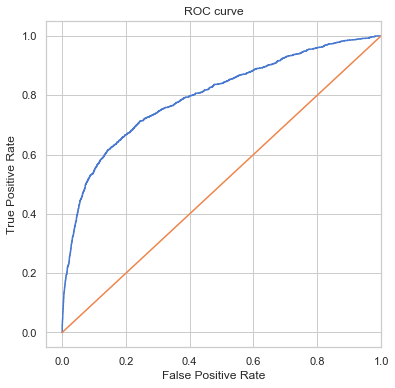

In [54]:
#sns.set(font_scale=1.2)
plt.figure(figsize=(6, 6))
fpr, tpr, thresholds = roc_curve(y_test, probs[:,1])
lw = 1.5
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [59]:
def show_proba_calibration_plots(y_predicted_probs, y_true_labels):
    preds_with_true_labels = np.array(list(zip(y_predicted_probs, y_true_labels)))

    thresholds = []
    precisions = []
    recalls = []
    f1_scores = []

    for threshold in np.linspace(0.1, 0.8, 15):
        thresholds.append(threshold)
        precisions.append(precision_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        recalls.append(recall_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        f1_scores.append(f1_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))

    scores_table = pd.DataFrame({'f1':f1_scores,
                                 'precision':precisions,
                                 'recall':recalls,
                                 'probability':thresholds}).sort_values('f1', ascending=False).round(3)
  
    figure = plt.figure(figsize = (15, 5))

    plt1 = figure.add_subplot(121)
    plt1.plot(thresholds, precisions, label='Precision', linewidth=4)
    plt1.plot(thresholds, recalls, label='Recall', linewidth=4)
    plt1.plot(thresholds, f1_scores, label='F1', linewidth=4)
    plt1.set_ylabel('Scores')
    plt1.set_xlabel('Probability threshold')
    plt1.set_title('Probabilities threshold calibration')
    plt1.legend(bbox_to_anchor=(0.25, 0.25))   
    plt1.table(cellText = scores_table.values,
               colLabels = scores_table.columns, 
               colLoc = 'center', cellLoc = 'center', loc = 'bottom', bbox = [0, -1.3, 1, 1])

    plt2 = figure.add_subplot(122)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 0][:, 0], 
              label='Another class', color='royalblue', alpha=1)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 1][:, 0], 
              label='Main class', color='darkcyan', alpha=0.8)
    plt2.set_ylabel('Number of examples')
    plt2.set_xlabel('Probabilities')
    plt2.set_title('Probability histogram')
    plt2.legend(bbox_to_anchor=(1, 1))

    plt.show()

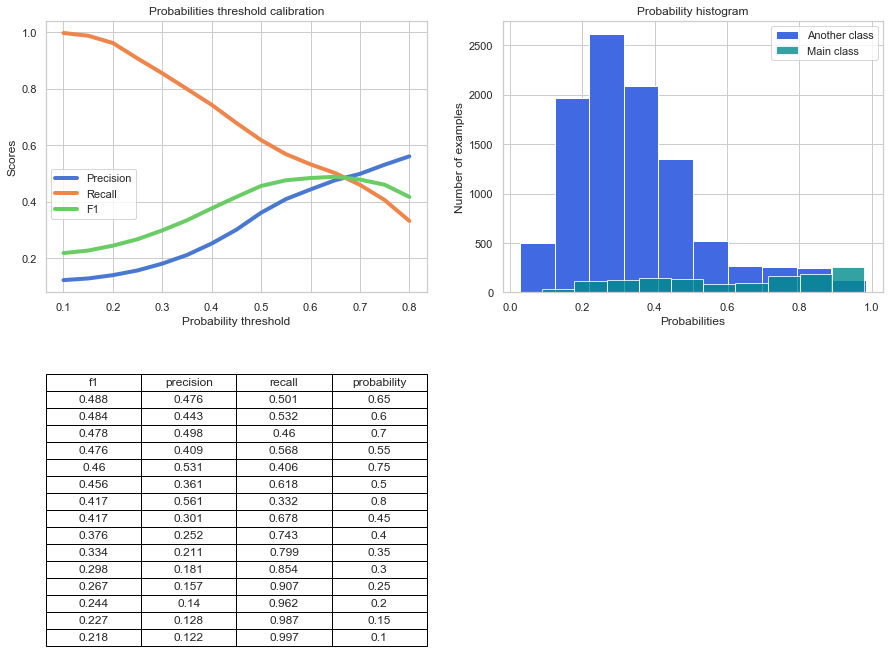

In [63]:
show_proba_calibration_plots(probs[:, 1], y_test.values)

In [64]:
def calc_pred(x):
    return np.array([1 if x >= 0.65 else 0 for x in x])

In [65]:
y_pred_ = calc_pred(probs[:, 1])

In [66]:
print(classification_report(y_test, y_pred_))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      9950
           1       0.48      0.50      0.49      1353

    accuracy                           0.87     11303
   macro avg       0.70      0.71      0.71     11303
weighted avg       0.88      0.87      0.88     11303



In [67]:
import dill
with open("model_trained_LGB.dill", "wb") as f:
    dill.dump(pipeline, f)